# Current population of Germany

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import datetime

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Population Germany, reference date.csv')
df = pd.read_csv(filepath)

# Head and Tail

In [4]:
df

,Date,Population
0,1950-12-31,50958125
1,1951-12-31,51434777
2,1952-12-31,51863761
3,1953-12-31,52453806
4,1954-12-31,52943295
...,...,...
66,2016-12-31,82521653
67,2017-12-31,82792351
68,2018-12-31,83019213
69,2019-12-31,83166711


In [5]:
df.shape                 

(71, 2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        71 non-null     object
 1   Population  71 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.2+ KB


In [7]:
df['Date'] = pd.to_datetime(df['Date'])                                # convert date series to datetime
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        71 non-null     datetime64[ns]
 1   Population  71 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.2 KB


# Data Transformation

In [8]:
df['Day'] = df['Date'].dt.day                                          # extract day
df['Month'] = df['Date'].dt.month                                      # extract month
df['Year'] = df['Date'].dt.year                                        # extract year
df['PctChg'] = df['Population'].pct_change()                           # return the percentage change in population
df.rename(columns={'Date': 'ReferenceDate'}, inplace=True)             # rename date column

df

,ReferenceDate,Population,Day,Month,Year,PctChg
0,1950-12-31,50958125,31,12,1950,NaN
1,1951-12-31,51434777,31,12,1951,0.009354
2,1952-12-31,51863761,31,12,1952,0.008340
3,1953-12-31,52453806,31,12,1953,0.011377
4,1954-12-31,52943295,31,12,1954,0.009332
...,...,...,...,...,...,...
66,2016-12-31,82521653,31,12,2016,0.004210
67,2017-12-31,82792351,31,12,2017,0.003280
68,2018-12-31,83019213,31,12,2018,0.002740
69,2019-12-31,83166711,31,12,2019,0.001777


In [9]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter
def million(x, pos):
    'The two args are the value and tick position'
    return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)

# Data Visualization

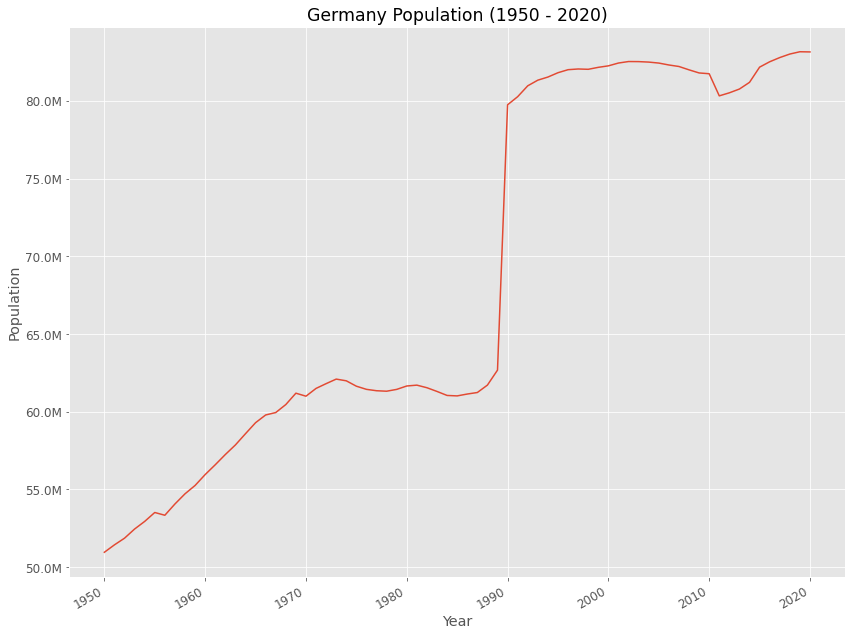

In [10]:
# initialize the matplotlib figure
fig, ax = plt.subplots()
fig.autofmt_xdate()

# plot exports trade
sns.lineplot(x='Year', y='Population', data=df, ax=ax)
ax.set(title='Germany Population (1950 - 2020)', xlabel='Year', ylabel='Population')

# set y-axis formatter
ax.yaxis.set_major_formatter(format_mill)

[Text(0.5, 0, 'Reference Date'),
 Text(0, 0.5, 'Percentage Change'),
 Text(0.5, 1.0, 'Percentage Change in Population for Germany (1950 - 2020)')]

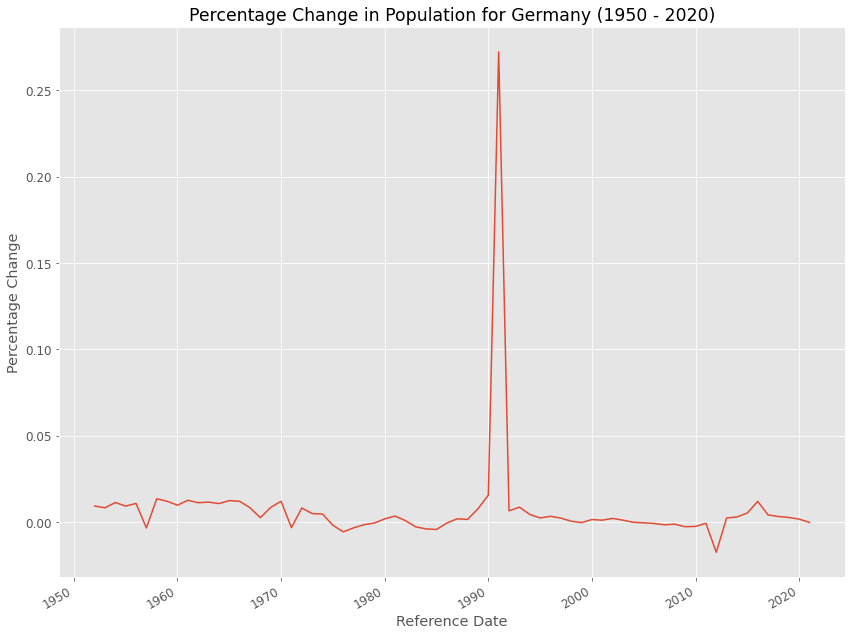

In [11]:
# create figure and axis
fig1, ax1 = plt.subplots()
fig1.autofmt_xdate()

# plot line chart
sns.lineplot(x='ReferenceDate', y='PctChg', ax=ax1, data=df)

# label plot
ax1.set(xlabel='Reference Date', ylabel='Percentage Change', title='Percentage Change in Population for Germany (1950 - 2020)')